**ASSIGNMENT 1 - EMPIRICAL STUDY OF KNAPSACK PROBLEM**

**1. Group Description**

Group Number: 100 \
Member Names: Sébastien Girard and Zachary Legros \
Member Student Numbers:
- Sébastien Girard: 300133000
- Zachary Legros: 300136274

**2. Knapsack Problem**

In this study focused on the knapsack problem, our aim is to explore various algorithms for optimizing the value of a knapsack (representing total price in our context) by making decisions on whether to include or exclude items based on their respective weights, all while ensuring that the overall weight does not surpass the bag's capacity.

**3. Dataset**

The dataset used for this experiment consists of 10,000 instances of the knapsack problem including it's optimal solution. It contains the respective weights and prices for each item, the bag's capacity, the optimal solution and the best total price.

*Dataset reference*

Chirag Chauhan. (2023). Knapsack Problem Dataset. Kaggle. Retrieved from https://www.kaggle.com/datasets/warcoder/knapsack-problem?resource=download

**Import important libraries**

In [ ]:
import pandas as pd
import itertools
import numpy as np

**Read Dataset**

As outlined in the project description, it should be possible for the correctors to execute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, you can upload it to a public GitHub repository and provide a link to the raw version of the dataset.

The link to the raw version is as follows:
*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.csv*

For example:

https://raw.githubusercontent.com/baharin/KnapsackProblem/main/knapsack_5_items.csv

Now provide the link to YOUR dataset and read the dataset using pandas:

In [ ]:
url = "https://raw.githubusercontent.com/sebastiengrd/AI-Assignment1/main/knapsack_5_items.csv"

dataset = pd.read_csv(url)

Let's see what are the columns of the dataset? :

In [ ]:
dataset.columns

Index(['Weights', 'Prices', 'Capacity', 'Best picks', 'Best price'], dtype='object')

As we expected, we have columns for weights, costs, capacity, best picks and best price for all the instances.

Now let's see the first 10 entries (rows):

In [ ]:
dataset.head(10)

,Weights,Prices,Capacity,Best picks,Best price
0,[46 40 42 38 10],[12 19 19 15 8],40,[0. 1. 0. 0. 0.],19.0
1,[11 31 4 6 7],[ 2 8 18 16 3],64,[1. 1. 1. 1. 1.],47.0
2,[32 49 27 37 24],[19 16 16 4 1],87,[1. 0. 1. 0. 1.],36.0
3,[20 35 22 23 16],[19 17 19 9 1],21,[1. 0. 0. 0. 0.],19.0
4,[ 7 12 19 13 20],[10 11 18 15 5],50,[0. 1. 1. 1. 0.],44.0
5,[27 10 25 25 7],[13 19 7 16 3],66,[1. 1. 0. 1. 0.],48.0
6,[21 2 33 45 26],[ 1 14 10 6 13],80,[0. 1. 1. 0. 1.],37.0
7,[37 27 39 14 25],[18 7 15 4 13],35,[0. 0. 0. 0. 1.],13.0
8,[ 1 48 4 23 39],[ 9 4 10 16 12],51,[1. 0. 1. 1. 0.],35.0
9,[ 4 3 22 9 32],[14 6 3 17 8],53,[1. 1. 0. 1. 1.],45.0


**Preprocessing Step**

Typically, the initial step in any project that involves reading and handling data is data preprocessing and cleansing.

In our dataset, we expect the entries in the "Weights," "Prices," and "Best Picks" columns to be in the form of arrays of floats or integers, like this: [45, 40, 42, 38, 10]

However, when you read each entry using pandas, they will be in a form of a string: "[45 40 42 38 10]"

So we need to convert these strings into "arrays of floats or integers." You can utilize the function provided below for this purpose:


In [ ]:
def string_to_list(string):

  string_list = string.strip('[]').split()

  float_list = [float(element) for element in string_list]

  return float_list

Furthermore, it's possible that certain rows in the dataset contain empty values in specific columns. We also aim to eliminate these rows as they do not provide any useful information. We use dropna() function to do so:

In [ ]:
#Ignore the warning messages.

dataset = dataset.dropna()

dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
dataset['Best picks'] = dataset['Best picks'].apply(lambda x : string_to_list(x))

<ipython-input-8-833fb421dc49>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
<ipython-input-8-833fb421dc49>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))


Now it's time to implement the search algorithms. For each algorithm, a template is provided to you. You can modify this template if you want. But first you should try to go look at all the parameters used, as they are all important. You can also define any number of auxiliary functions you want.


**4. Generate and Test**


Recursive way to solve the {0 .. 1} knapsack problem.

This function takes the weight, the values, and the weights of the items it evaluates two scenarios, one where it takes the last item, and one where it doesn't then.

It then recursively computes the knapsackproblem for the remaining items, and returns the maximum value of the two scenarios.

It has a runtime of O(2^n), which is bad. However, because our knapsack problems each have at most 5 items, this solution is acceptable from a runtime perspective.

In [ ]:
# recursive way to solve the {0 .. 1} knapsack problem
def knapsack_solver(weight, values, weights):

  # base case. If there is no values left, or the weight is 0, then we return 0
  if (weight == 0 or len(values) == 0):
    return 0, []

  do_not_take_last, do_not_take_last_result = knapsack_solver(weight, values[:-1], weights[:-1])
  take_last, take_last_result = knapsack_solver(weight - weights[-1], values[:-1], weights[:-1])
  take_last += values[-1]

  if (weight - weights[-1] < 0 or do_not_take_last > take_last):
    return do_not_take_last, do_not_take_last_result + [0]

  return take_last, take_last_result + [1]


def gen_and_test(data): #takes one row, and must compute the best solution for that row
  # implement knapsack solution
  best_solution_price, best_solution = knapsack_solver(data['Capacity'], data['Prices'], data['Weights'])

  return best_solution_price, best_solution


In [ ]:
solutions = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = gen_and_test(row)
    solutions.append(1 if target == solution else 0)

In [ ]:
# Accuracy
print('Accuracy of best prices found is', np.mean(solutions))

Accuracy of best prices found is 1.0


**Your Analysis:**

***Result***


The accuracy is 1.0 (100%) as expected since we know (and studied why) this algorithm to be valid to solve this problem.

The algorithm used and implemented is an efficient way to use recurion to solve this problem.

***Accuracy of Dataset***

With this experiment, we verified that the Kaggle knapsack dataset is valid and the answers provided are accurate.
We validated this because we obtained an accuracy of 100%.

***Runtime***

The runtime of this algorithm to solve 1 knapsack problem is O(2^n). This is particularly bad.

However, this is not an issue in our case since it is known that the number of items (n) is minimal (5) for all of our problems.

Therefore, this algorithm is efficient for our use case.

If we wanted a better algorithm, we could have use dynamic programming to solve this problem, which could've provided a runtime of O(nW), where n is the number of items and W is the capacity of the knapsack.

------------------------------------------------------------------------------------------------

**5. Greedy Search**

During the greedy search, we compute the ratio between each item's price and weight and sort the result in descending order. These values will help us identify the best value we can get for the weight we add to the knapsack.

Using the previously computed ratios, we can insert the respective item from the sorted ratios if the total weight does not exceed the knapsack's capacity.

This approach is not optimal in our case since we are not using a fractional knapsack, but this will be further explained later on.

In [ ]:
# Helper function returning the sum of the product of two 1D lists with the same size
def sum_of_product(arr1, arr2):
  return (np.array(arr1) * arr2).sum()


def greedy(data):
  # Computing the price / weight for each item and storing it in a new list alongside the original index
  prices_per_weights = [[p / w, int(i)] for p, w, i in zip(data["Prices"], data["Weights"], range(len(data["Weights"])))]
  # Sort the price/weight ratios in descending order
  prices_per_weights.sort(reverse=True)
  # Initializing the bag as empty
  result = [0,0,0,0,0]
  _, ppw_i = np.transpose(prices_per_weights)
  for ppw_i, j  in zip(ppw_i.astype(int), range(len(prices_per_weights))):
    # Compute the total weight of the knapsack
    total_weight = sum_of_product(result, data["Weights"])
    # Check if we can add the current item to the knapsack
    if total_weight + data["Weights"][ppw_i] <= data["Capacity"]:
      result[ppw_i] = 1
    else:
      result[ppw_i] = 0
  return sum_of_product(data['Prices'], result), result

In [ ]:
solutions_greedy = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = greedy(row)
    solutions_greedy.append(1 if target == solution else 0)


In [ ]:
print("Greedy Accuracy is", np.mean(solutions_greedy))

Greedy Accuracy is 0.8342949691264298


***Result***

The accuracy is about 0.834 (83.4%) which is not optimal. Usually, the greedy search has perfect accuracy when using a fractional knapsack where we can include an item partially. However, in our case, we are using a knapsack where we can't partially add items. This is causing issues where we sometimes run into edge cases where we could add an item that would make the knapsack more valuable while respecting the capacity restrictions, but we would have to rearrange the prior items in order to do so.

***Runtime***

For this algorithm, assuming that the python list sorting algorithm sorts in O(nlog(n)), the running time is O(nlog(n)). This is a decent running time compared to the recursive approach previously discussed which was O(2^n).

------------------------------------------------------------------------------------------------

**6. Simulated Annealing**

The Simulated Annealing optimization algorithm iteratively explores randomly generated solutions and accepts them based on their optimality compared to the previous solution. However, depending on a decreasing probability determined by the system's temperature, which decreases after a specified number of iterations (N), the algorithm may occasionally choose a worse solution to escape local minima.

**Implementation**

*Cost function*

The cost function used in this implementation evaluates the difference between the knapsack capacity and the sum of the values of items in the solution.

*Accept function*

The acceptance function rejects any solution having a total weight over the knapsack's capacity. It accepts the other solutions based on a probability defined by ***1 / (1 + exp(delta_e / t))*** where *delta_e* is the difference between the cost of the candidate solution and the current solution and *t* is the temperature of the system.

*Candidate generation*

New candidate solutions are completely randomly generated and tested against the previously defined acceptance function.

*Temperature Scheduling*

After *N* iterations at a given temperature, the system will reduce its temperature by a factor given by the *cooling_rate* parameter. This is done until the system reaches a temperature lower than 5% of the initial temperature.

In [ ]:
import random
import math

# Cost function for a given bag. The lower the cost, the better the solution.
def cost(x, data):
  return data['Capacity'] - sum_of_product(data['Prices'], x)


# Accept the candidate solution if it has a higher energy (value) and
# a weight that is smaller than the capacity
def accept(candidate_picks, delta_e, t, data):
  total_weight = sum_of_product(data['Weights'], candidate_picks)
  if total_weight > data['Capacity']:
    return False
  # If the candiate solution has a weight greater than the capacity, we accept
  # it based of the probability evaluated below.
  else:
    try:
      prob = 1 / (1 + math.exp(delta_e/t))
      return random.random() < prob
    # When the temperature gets small, we might run into an overflow error when
    # evaluating math.exp(). In that case, we can reject the candidate since the
    # probability is very close to zero.
    except OverflowError:
      return False


# Generate a random solution candidate using the random module
def generate_candidate():
  return [round(random.random()) for _ in range(5)]


def simulated_annealing(data, N, initial_temperature, cooling_rate):
  t = initial_temperature
  x = [0,0,0,0,0]
  e = cost(x, data)
  it = 0

  # Iteratively generate candidate solutions until the system's temperature
  # is below 0.05.
  while t > 0.05 * initial_temperature:
    # Generate new random candidate
    candidate = generate_candidate()
    # Compute the cost of the new candidate
    candidate_e = cost(candidate, data)
    delta_e = candidate_e - e
    # If the new candidate is accepted as a new solution, we set it as the
    # current solution.
    if accept(candidate, delta_e, t, data):
      x = candidate
      e = candidate_e
    # We run N iterations before lowering the temperature
    it = (it + 1) % N
    if it == 0:
      t *= cooling_rate

  return sum_of_product(data['Prices'], x), x

In [ ]:
solutions_sa = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, N = 10, initial_temperature=1, cooling_rate=0.95)
    solutions_sa.append(1 if target == solution else 0)


In [ ]:
print("Simulated Annealing Accuracy is", np.mean(solutions_sa))

Simulated Annealing Accuracy is 1.0


**Your Analysis:**

**Result**

The best accuracy achieved by this implementation is 1.0 (100%) which is optimal. This great result was achieved using the default paramenters provided: N=10, initial_temperature=1 and cooling_rate=0.95. When lowering the parameter *N* to 1 and keeping the cooling rate at 0.95, we get an accuracy of 0.85 (85%). To increase the accuracy with a temperature scheduling preiod (N) of 1, we can set the cooling rate to 0.999 in order to get an accuracy of 0.99 (99.9%).

In general, the simulated annealing algorithm's accuracy increases proportionaly with the number of iterations. Therefore, when we increase the temperature scheduling period (N) and the cooling rate, we have an accuracy nearing 100%.

------------------------------------------------------------------------------------------------

**7. Genetic Algorithm**

<ins>Generation</ins>

For each generation of the genetic algorithm, we generate a Population of Solution.

The Population is a set of potential solutions of the knapsack problem.

In order to generate a generation from a previous generation. Each Solution of this new population is generated according to this pseudocode (the solutions in the new generations are being generated in pairs of 2):
1. Do a 2 trials, and select the best solutions in each trial
2. Take the 2 best solutions of the 2 trials (1 each), and to a mutation
3. For each solutions created from the mutation, mutate them
4. Repeat step 1 until the new population is generated

*Initial Generation of the Population*
Initially, a Population is generated with Random Solutions. A random solution is a solution where each items has 50% chance of being included in a knapsack bag

<ins>Fitness and trials</ins>

The way fitness is calculated is:
- If the weight of the selected items exceeds the capacity of the knapsack bag, the fitness is 0 (bad solution)
- Else, the fitness is the sum of all the items in the bag

This way of calculating the fitness allows us to eliminate the bad solutions (items weights exceed the capacity), while maximizing the sum of prices inside the bag

In [ ]:
import random

class Item:
  def __init__(self, price, weight):
    self.price = price
    self.weight = weight

  def __str__(self):
    return f"Item: price={self.price}, weight={self.weight}"


# This class represents one possible solution of the problem. Therfore, it has a list of items, and a list of weights
# It is also used to calculate the fitness of this possible solution. This possible solution can be good or bad
class Solution:
  def __init__(self, items, weights, capacity ):
    self.items = items # liste of Item objects
    self.weights = weights
    self.capacity = capacity

  # Function that returns all the items that are included in the solution
  def get_all_included_items(self):
    included_items = []
    for item, weight in zip(self.items, self.weights):
      if (weight):
        included_items.append(item)
    return included_items

  def calculate_total_weight(self):
    total_weight = 0
    for item in self.get_all_included_items():
        total_weight += item.weight
    return total_weight

  # We want a function that calculates how good the solution is.
  # A high fitness indicates a good solution.
  def calculate_fitness(self):
    if(self.calculate_total_weight() > self.capacity ): # if the total weights exceeds is over the capacity, the solution is bad and we return 0
      return 0

    # We loop over each items, and if the weight is 1, we add the price to the total for this solution
    total_value = 0
    for item in self.get_all_included_items():
        total_value += item.price

    return total_value



  # Function that returns a new solution with mutations
  def mutation(self, mut_rate):
   newWeights = []

   for weight in self.weights:
      if random.random() < mut_rate:
        newWeights.append(1 - weight)
      else:
        newWeights.append(weight)

   return Solution(self.items, newWeights, self.capacity)

  def __str__(self):
    return f"Solution: items={self.items}, weights={self.weights}"



def getItemsFromRow(row):
  items = []
  for price, weight in zip(row['Prices'], row['Weights']):
    items.append(Item(price, weight))
  return items


# Function that takes two solutions, cross them according to a cross_rate, and returns two new solutions
def crossover(parent1, parent2, cross_rate):

  if random.random() > cross_rate:
    return parent1, parent2

  child1_weights = []
  child2_weights = []
  for weight1, weight2 in zip(parent1.weights, parent2.weights):
    if random.random() < 0.5:
      child1_weights.append(weight1)
      child2_weights.append(weight2)
    else:
      child1_weights.append(weight2)
      child2_weights.append(weight1)

  child1 = Solution(parent1.items, child1_weights, parent1.capacity)
  child2 = Solution(parent2.items, child2_weights, parent2.capacity)
  return child1, child2

def generate_initial_random_population(items, population_size, capacity):
  solutions = []
  for _ in range(population_size):
    weights = [random.randint(0, 1) for _ in range(len(items))]
    solutions.append(Solution(items, weights, capacity))
  return solutions

def tournament_selection(population, tournament_size):
  tournament = random.sample(population, tournament_size)
  return max(tournament, key=lambda x: x.calculate_fitness())

def generate_new_population(population, population_size, mut_rate, cross_rate, tournament_size):
  new_population = []
  while len(new_population) < population_size:
    # We select two solutions from the population, and we cross them
    parent1 = tournament_selection(population, tournament_size)
    parent2 = tournament_selection(population, tournament_size)
    child1, child2 = crossover(parent1, parent2, cross_rate)
    # We mutate the two children
    child1 = child1.mutation(mut_rate)
    child2 = child2.mutation(mut_rate)
    # We add the two children to the new population
    new_population.append(child1)
    new_population.append(child2)

  return new_population

def genetic_algorithm(data, population_size, num_generations, mut_rate, cross_rate, tournament_size):
  items = getItemsFromRow(data) # get a list of Items from the row
  capacity = data['Capacity']

  # We create a list of solutions, with random weights
  population = generate_initial_random_population(items, population_size, capacity)

  for generation_i in range(num_generations):
    population = generate_new_population(population, population_size, mut_rate, cross_rate, tournament_size)
    # We replace the old population with the new one

  # We return the best solution of the population
  best_solution = max(population, key=lambda x: x.calculate_fitness())
  return best_solution.calculate_fitness(), best_solution.calculate_total_weight()



In [ ]:
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)
    # print(f"{len(solutions_ga)} / {len(dataset)} : Genetic Algorithm Accuracy is {np.mean(solutions_ga)}")



In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.998279178054459


***Accuracy***

The accuracy of the genetic algorithm is very good, approximately 0.998 (99.8%).


With this accuracym we can know that the genetic algorithm works, and that only the best selections are being generated.

***Factor Affecting Accuracy***

We can try to play a little bit with the parameters of our genetic algorithm to know which parameters affect it the most.

We know our initial parameters provide good results. Therefore, we can use those as a baseline.

In [ ]:
import matplotlib.pyplot as plt

# playing with the parameters. We will only use 50 random simulations for each parameter, because it takes a long time to run otherwise

# we want to find the best population size
def genetic_algorithm_limited(number_of_solutions, population_size, num_generations, mut_rate, cross_rate, tournament_size):
    solutions_ga = []
    i = 0
    for _ in range(number_of_solutions):
        row = dataset.iloc[np.random.randint(len(dataset))]
        target = row['Best price']
        solution, indexes = genetic_algorithm(row, population_size, num_generations, mut_rate, cross_rate, tournament_size)
        solutions_ga.append(1 if target == solution else 0)
        i += 1
        if i == number_of_solutions:
            break
    return np.mean(solutions_ga)

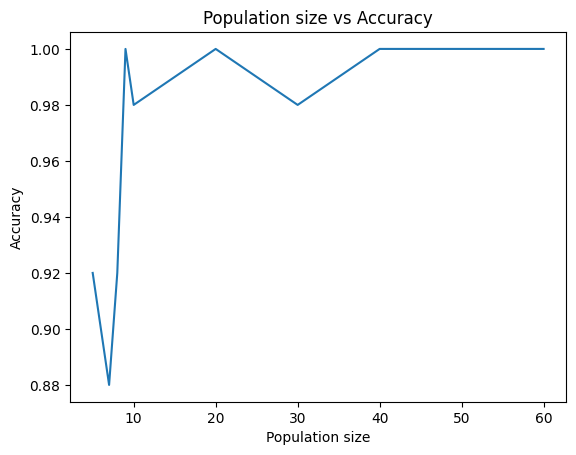

In [ ]:

population_sizes = [5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60]

results = []
for population_size in population_sizes:
    result = genetic_algorithm_limited(number_of_solutions=50, population_size=population_size, num_generations=50, mut_rate=0.1, cross_rate=0.7, tournament_size=5)
    results.append(result)

# graph the results
plt.plot(population_sizes, results)
plt.xlabel('Population size')
plt.ylabel('Accuracy')
plt.title('Population size vs Accuracy')
plt.show()


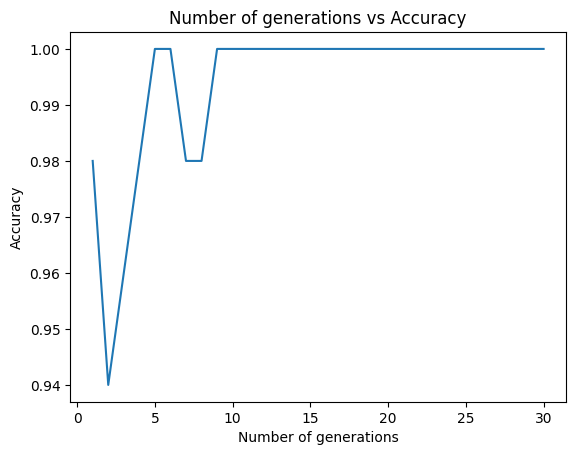

In [ ]:
# Do the same with number of generations

generations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]

results = []
for generation in generations:
    result = genetic_algorithm_limited(number_of_solutions=50, population_size=50, num_generations=generation, mut_rate=0.1, cross_rate=0.7, tournament_size=5)
    results.append(result)

# save the results in a subplot
plt.plot(generations, results)
plt.xlabel('Number of generations')
plt.ylabel('Accuracy')
plt.title('Number of generations vs Accuracy')
plt.show()



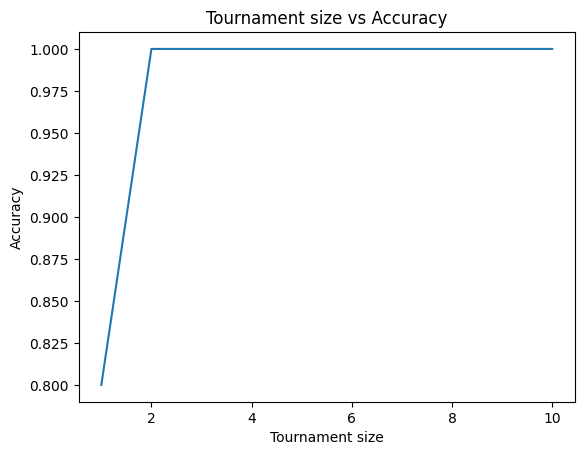

In [ ]:
# Do the same for tournament size

tournament_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

results = []
for tournament_size in tournament_sizes:
    result = genetic_algorithm_limited(number_of_solutions=50, population_size=50, num_generations=50, mut_rate=0.1, cross_rate=0.7, tournament_size=tournament_size)
    results.append(result)

# save the results in a subplot
plt.plot(tournament_sizes, results)
plt.xlabel('Tournament size')
plt.ylabel('Accuracy')
plt.title('Tournament size vs Accuracy')
plt.show()

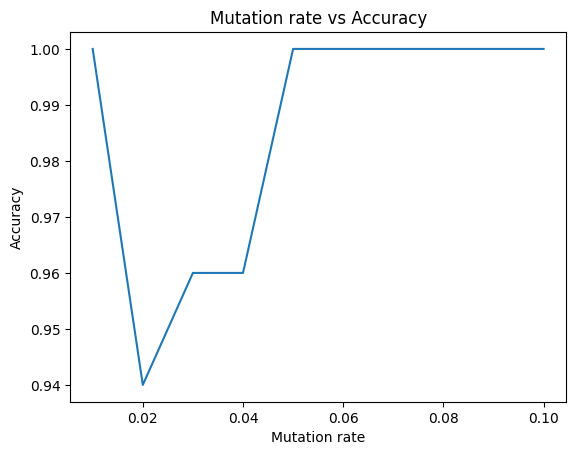

In [ ]:
# Do the same for mutation rate

mutation_rates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

results = []
for mutation_rate in mutation_rates:
    result = genetic_algorithm_limited(number_of_solutions=50, population_size=50, num_generations=50, mut_rate=mutation_rate, cross_rate=0.7, tournament_size=5)
    results.append(result)

# save the results in a subplot
plt.plot(mutation_rates, results)
plt.xlabel('Mutation rate')
plt.ylabel('Accuracy')
plt.title('Mutation rate vs Accuracy')
plt.show()


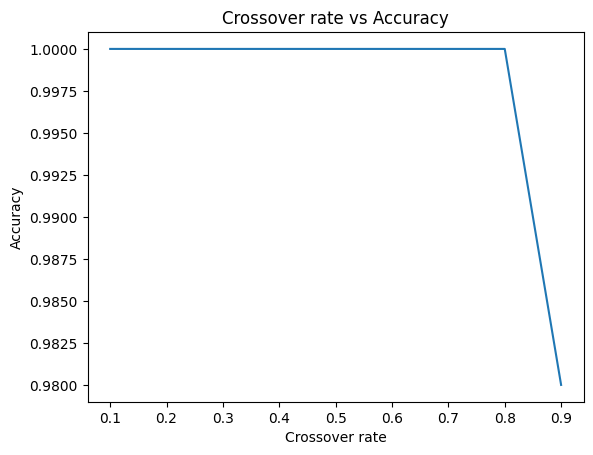

In [ ]:
# Do the same for crossover rate

crossover_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

results = []
for crossover_rate in crossover_rates:
    result = genetic_algorithm_limited(number_of_solutions=50, population_size=50, num_generations=50, mut_rate=0.1, cross_rate=crossover_rate, tournament_size=5)
    results.append(result)

# save the results in a subplot
plt.plot(crossover_rates, results)
plt.xlabel('Crossover rate')
plt.ylabel('Accuracy')
plt.title('Crossover rate vs Accuracy')
plt.show()

### Results

From theses experiments, we can determine how the following parameters affected our results:

*Population Size*

The population size is an *important* variable in our genetic simulation. it can affect the accuracy to go as low as 84%. However, a large enough population size (>40 in our experiment) will guarantee a good accuracy.

*Number of Generations*

The number of generations is an *important* variable in our genetic simulation. If it is too low, the simulation will not have enough generation to find the optimal solution to the knapsack problem. A low number of generation (<15) can decrease the accuracy down to 96%. This means that in some scenarios, we could be stuck in a local minima or not have enough time to find a minima at all.

However, after 15 generations, the accuarcy of the solution generaly improves to 100%.

*Mutation Rate*

We found that this variable is an *important parameter* in our simulation. If the mutation rate is not high enough, there won't be enough diversity in our population of solutions to reach a global minima.

*CrossOver Rate*

We found that the crossover rate is *not an important* variable in our simulation. This could be because the population is large, and in term of diversity, the effect of crossing over two solutions is minimal compared to mutating already good solutions.



------------------------------------------------------------------------------------------------

**8. Comparative Study**

Important aspects to consider when comparing ways to solve a problems are
- The accuracy
- The time it took to solve the problem

We also need to take into consideration the variance of those algorithms.


The graph below summarize the results of the 4 algorithms we tested

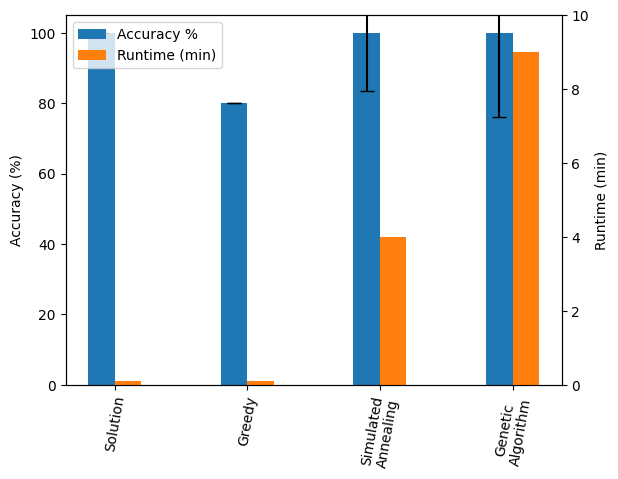

In [ ]:
import matplotlib.pyplot as plt

solutions_accuracy = 100
solutions_ga_accuracy = 99.99
solutions_sa_accuracy = 100
solution_greedy_accuracy = 80

solutions_accuracy_var = 0
solutions_ga_accuracy_var = 24
solutions_sa_accuracy_var = 16.6
solution_greedy_accuracy_var = 0.05

solutions_runtime = 0.1
solution_greedy_runtime = 0.1
solutions_sa_runtime = 4
solutions_ga_runtime = 9

labels = ['Solution', 'Greedy', 'Simulated\nAnnealing', 'Genetic\nAlgorithm']
x = range(len(labels))

fig, ax1 = plt.subplots()
ax1.bar(x, [solutions_accuracy, solution_greedy_accuracy, solutions_sa_accuracy, solutions_ga_accuracy], width=0.2, label='Accuracy %', yerr=[solutions_accuracy_var, solution_greedy_accuracy_var, solutions_sa_accuracy_var, solutions_ga_accuracy_var], capsize=5)
ax1.set_xticks([i+0.1 for i in x])
ax1.set_xticklabels(labels, rotation=80, ha='center')
ax1.set_ylim([0, 105])
ax1.set_ylabel('Accuracy (%)')

ax2 = ax1.twinx()
ax2.bar([i+0.2 for i in x], [solutions_runtime, solution_greedy_runtime, solutions_sa_runtime, solutions_ga_runtime], width=0.2, label='Runtime (min)', color='C1')
ax2.set_ylim([0, 10])
ax2.set_ylabel('Runtime (min)')

# add legend for both accuracy and runtime
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

plt.show()

As seen in the graph above, each algorithm has their own strengths and weaknesses.


*Solution Algorithm*

This algorithm was the fastest and the most accurate (100%). However, we must remember that the algorithm choosen to compute the solution has a runtime of O(2^n). This algorithm probably ran very fast in our case because the number of items was limited to 5. However, for other knapsack problems with more possible items, we expect this algorithm to be increasignly slow because it is O(2^n).

*Greedy*

The accuracy of the greedy algorithm is very poor (around 80%). This means that the algorithm often reaches a local minima, and never finds the optimal solution. However, on the positive side, it's execution time is very fast.

This algorithm is optimal if we want to obtain a "good enough" solution within a set period of time, without caring about the true optimal solution.

*Simulated Anealing*

The simulated Anealing performed very well, with an accuracy of 100%. However, it is much slower than other algorithms like greedy. It is an algorithm that attemps a lot of different solutions at random, and hopes to find an optimal solution at some point.

In our case, this worked very well because we did not have a lot of items, which means that there was not a lot of possible permutation. Because we made a lot of guess, we happened to guess the optmial solution each time.

However, as the number of item will increase, the chance to guess the optimal solution will decrease exponentially (since where the number of potential permutation of solutions will increase exponentially).

This means that the Simulated Anealing is a very good algorithm in our case, but think its accuracy might drop significantly as the number of items increase.


*Genetic Algorithm*

The genetic algorithm had the worse runtime of all the algorithms we tested. However, its accuracy to find the optimal solution was very good (99.99).

Since the Genetic Algorithm has a sense of "evolution" (it learns with iteration and time), we expected this kind of performance on a small data set like ours (with 5 items maximum). It was slow for our use case. However, for larger knapsack problems, this algorithm might be a good candidate, since we expect for it to converge to a solution more quickly than the other algorithms.


--------------------------------------------------------------------------


**9. Conclusion**

During this study, we evaluated the accuracy of four different algorithms including a recursive solver, greedy search, simulated annealing and genetic algorithm.

Using the default parameters, the algorithm which had the lowest accuracy was the greedy search at 83.4%. This happened since we are working with a 0-1 knapsack instead of a fractional knapsack therefore we encountered unhandled edge cases which reduced the accuracy.

The best perfoming algorithms using the default parameters were the recursive solver and simulated annealing. However, when tweaking the simulated annealing algorithm using a temperature scheduling period (N) of 1 instead of 10, we got an accuracy of 85% which is almost as bad as our greedy search. We determided that the simulated annealing accuracy increased as we chose parameters values yielding more iterations.

In terms of runtimes, since we used knapsacks of 5 elements, the recursive solution was by far the fastest, but has runtime O(2^n) in our case which would perform horribly against an algorithm like the greedy search which is O(nlog(n)) when using larger knapsacks. On the other hand, the accuracy of the greedy algorithm is to be desired at around 83.4%. This leaves us with simulated annealing and genetic mutation. The genetic mutation had a runtime twice as big as the other, but we can argue that it will perform better than simulated annealing on datasets with large knapsacks. This is due to the fact that simulated annealing has an exponential runtime since the more items the dataset has, the more possibilities and the probability to find an optimal solution decreases drastically if we don't exponentially add iterations. Therefore, the genetic mutaiton would be a better choice on large datasets because it tends to converge to the best solution and does not scale with the amount of items.

For future work, we suggest using a better implementation of the first algorithm since it is possible to implement it as O(nW) where n is the number of items and W is the maximum weight capacity using dynamic programming. Moreover, using a dataset with containing more entries and more items per problem would give a more realistic performance overview of the algorithms.

--------------------------------------------------------------------------


**10 References**

- Chirag Chauhan. (2023). Knapsack Problem Dataset. Kaggle. Retrieved from https://www.kaggle.com/datasets/warcoder/knapsack-problem?resource=download
- Simulated Annealing Explained By Solving Sudoku -
Challenging Luck - https://www.youtube.com/watch?v=FyyVbuLZav8
- he Knapsack Problem & Genetic Algorithms - Computerphile - https://youtu.be/MacVqujSXWE?si=AnFl8H6P_KZP8qG9
- 0/1 Knapsack Problem - Geeks for Geeks - https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/

**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".